# A radiação do corpo negro e a radiação cósmica de fundo (CMB)

* PET - Física UFRN
* Petiano: Gabriel Wendell Celestino Rocha
* Data: 31 de Agosto de 2020

O objetivo deste `Notebook` é examinar as características da **radiação do corpo negro** de forma geral, e em seguida, aplicar ao caso particular do espectro de radiação térmica da **radiação cósmica de fundo (CMB)**

O estudo das propriedades dos objetos celestes, como sua cor ou luminosidade, requer o conceito de corpo emissor ideal de radiação conhecido como _"corpo negro"_. As estrelas irradiam energia que por sua vez depende de sua **temperatura** e do **comprimento de onda** da radiação emitida, e a lei de emissão de um corpo negro pode ser considerada como uma primeira aproximação das características dessa radiação.

Dessa forma, nesta primeira parte deste `Notebook`, será mostrado como construir as curvas de radiação características de um corpo negro em diferentes temperaturas em Python.

## Radiação do corpo negro

A equação de Planck representa a intensidade da radiação de um corpo negro em função do comprimento de onda. Existe uma curva para cada temperatura do corpo negro. Sua forma é conhecida como ["**Lei de Planck**"](https://doi.org/10.1007/BF01327326) [3]:

$$B_{\lambda}(T)=\frac{2hc^{2}}{\lambda^{5}}\cdot\frac{1}{e^{\frac{hc}{\lambda k_{B}T}}-1}$$

onde $B$ é a **radiância espectral**, definida como a energia emitida por unidade de área de um corpo negro em um ângulo sólido unitário normal à área, por unidade de comprimento de onda.

A letra $B$ é geralmente usada no lugar da letra $I$ com a qual as intensidades são genericamente designadas, para sublinhar que estamos nos referindo especificamente a um corpo negro (**"Blackbody"**). Suas unidades, assumindo que medimos comprimentos de ondas em nanômetros, serão: 

$$[B] = W\cdot m^{-2}\cdot nm^{-1}\cdot sr^{-1}$$

onde $sr$ é a unidade de ângulo sólido "esterradiano".

Note que a fórmula da Lei de Planck utiliza as seguintes constantes :

* $k_{B} :$ Constante de Boltzmann 
* $h : $ Constante de Planck 

De posse dessas informações, vamos implementar o que foi visto até agora...

### Importando as bibliotecas

In [2]:
import matplotlib.pyplot as plt
import quantities as pq
import pandas as pd
import numpy as np

# Para que essa cell-magic (ou inline-magic) funcione corretamente, execute 
# essa célula duas vezes.
%matplotlib notebook

Note que importamos uma biblioteca um tanto quanto "diferente". A biblioteca `quantities` (você pode checar a documentação dessa biblioteca [aqui](https://pythonhosted.org/quantities/)) é uma biblioteca que permite utilizar as mais diversas unidades físicas em Python. Existem várias bibliotecas do Python que permitem trabalhar com unidades e constantes físicas. Você também pode definir as constantes físicas de maneira manual caso não queira utilizar nenhuma biblioteca. Neste `Notebook` em específico iremos utilizar a biblioteca `quantities`.

Você pode instalar a biblioteca `quantities` usando o `pip` executando o seguinte comando no prompt de comando (CMD) :

`pip install quantities`

A biblioteca `pandas` (para mais informações clique [aqui](https://pandas.pydata.org/)) é uma biblioteca do Python desenvolvida para manipulação e análise de dados. Em particular, oferece estruturas de dados e operações para manipular tabelas numéricas e séries temporais. Iremos usar essa biblioteca posteriormente quando formos tratar da radiação cósmica de fundo.

Você pode instalar a biblioteca `pandas` usando o `pip` executando o seguinte comando no CMD :

`pip install pandas`

Vamos usar também uma magic extension `%version_information` do `IPython` para gerar um quadro com as informações sobre quais versões das bibliotecas que foram usadas para executar este `Notebook`.

Você pode instalar a extensão `%version_information` usando o `pip` executando o seguinte comando no CMD :

`pip install version_information`

In [3]:
%load_ext version_information
%version_information matplotlib, quantities, pandas, numpy

Software versions
Python 3.7.5 64bit [MSC v.1916 64 bit (AMD64)]
IPython 7.10.0
OS Windows 10 10.0.18362 SP0
matplotlib 3.1.2
quantities 0.12.4
pandas 0.25.3
numpy 1.17.4
Thu Oct 29 21:29:18 2020 Hora Padrão de Buenos Aires

Dada essa explicação, vamos ao código... 

Primeiramente, vamos ver como as constantes mencionadas anteriormente são definidas utilizando a bibliteca `quantities`:

In [4]:
print(repr(pq.constants.Planck_constant))
print(repr(pq.constants.Boltzmann_constant))

UnitConstant('Planck_constant', 6.62606896e-34 * s*J, 'h')
UnitConstant('Boltzmann_constant', 1.3806504e-23 * J/K, 'k')


Vamos agora definir uma função que permitirá calcular a radiância espectral segundo a fórmula de Planck.

In [5]:
def B(wl,T):
     I = 2 * pq.constants.h * (pq.c)**2 / wl**5 *  \
         1 / (np.exp((pq.constants.h*pq.c \
         / (wl*pq.constants.k*T)).simplified)-1)
    
     return I.rescale(pq.watt/(pq.m**2 * pq.nm * pq.sr))

Nesse caso, `wl` é um array de comprimentos de onda com unidades de comprimento e `T` é uma temperatura expressada em $K$. O resultado será um array de r.e. com unidades $W\cdot m^{-2}\cdot nm^{-1}\cdot sr^{-1}$

Verificaremos o funcionamento correto da função com um exemplo:

In [6]:
B(5000*pq.angstrom,5780*pq.K)

array(26421.6296097) * W/(m**2*nm*sr)

Vamos criar uma função para melhorar um pouco a estética dos nossos plots.

In [7]:
def opt_plot():
    plt.minorticks_on()
    plt.tick_params(axis='both',which='minor', direction = "in",
                    top = True,right = True, length=5,width=1,
                    labelsize=15)
    plt.tick_params(axis='both',which='major', direction = "in",
                    top = True,right = True, length=8,width=1,
                    labelsize=15)

Vamos agora aplicar esta função para obter as curvas de radiação do corpo negro para quatro temperaturas:

In [8]:
T1 = 4000 * pq.Kelvin
T2 = 5000 * pq.Kelvin
T3 = 6000 * pq.Kelvin
T4 = 7000 * pq.Kelvin

Agora vamos plotar as curvas...

<IPython.core.display.Javascript object>


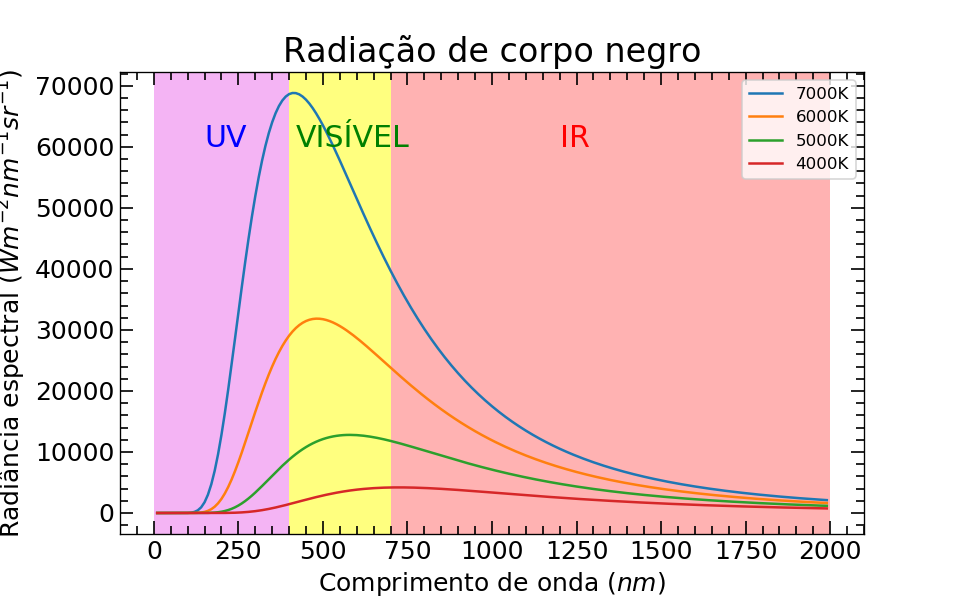

In [9]:
# array de comprimento de onda (em nm).
wl = np.arange(10,2000,10) * pq.nm    

fig, ax = plt.subplots(figsize=(8, 5))
ax.plot(wl, B(wl,T4), label='7000K')
ax.plot(wl, B(wl,T3), label='6000K')
ax.plot(wl, B(wl,T2), label='5000K')
ax.plot(wl, B(wl,T1), label='4000K')
ax.legend(loc = 'best')
ax.set_title(u'Radiação de corpo negro')
ax.title.set_fontsize(20)
ax.set_xlabel('Comprimento de onda ($nm$)')
ax.xaxis.label.set_fontsize(15)
ax.set_ylabel('Radiância espectral $(W m^{-2}nm^{-1}sr^{-1})$')
ax.yaxis.label.set_fontsize(15)
ax.axvspan(0,400,facecolor = 'violet',alpha = 0.6)
ax.axvspan(400,700, facecolor='yellow', alpha = 0.5)
ax.axvspan(700,2000, facecolor ='red', alpha = 0.3)
ax.text(150,6e4, 'UV', fontsize=18, color = 'b')
ax.text(1200,6e4, 'IR', fontsize=18, color = 'r')
ax.text(420,6e4, 'VISÍVEL', fontsize=18, color = 'green');
opt_plot()

plt.savefig('Radiação de corpo negro.png')

Na figura acima, pode-se se ver muito bem como, à medida que a temperatura do corpo negro aumenta, o máximo da intensidade emitida corresponde a comprimentos de onda cada vez mais curtos, ou seja, frequências mais altas, ou **fótons mais energéticos**, entrando neste máximo, de $7000K$, na região do ultravioleta (UV). Este fato é expresso matematicamente pela lei de Wien.


## Lei de Wien

O comprimento de onda máximo $\lambda_{max.}$ emitido por um corpo negro é dado por:

$$\lambda_{max.}=\frac{b}{T}$$

onde $b$ é a constante de Wien, cujo valor é dado por:

In [10]:
print(repr(pq.constants.b))

UnitConstant('Wien_wavelength_displacement_law_constant', 0.0028977685 * m*K, 'b')


#### Exemplo: 

A estrela [Betelgeuse](https://www.aavso.org/vsots_alphaori) [5], na constelação de Orion possui uma temperatura superficial de $3.6\cdot 10^{3}K$. Considerando em uma primeira aproximação a estrela em questão como um corpo negro, vamos determinar em que comprimento de onda a radiação máxima apresentará seu espectro.

In [11]:
l_max = pq.constants.b/(3600 * pq.K)
print('%d Angstrom' %l_max.rescale(pq.angstrom))

8049 Angstrom


Ou seja, a radiação de Betelgeuse atingirá o pico na região próxima do infravermelho (IR).

A lei de Wien também pode ser usada para estimar a temperatura de uma estrela a partir de seu espectro (sempre com a aproximação de assumir um modelo de radiação de corpo negro). Suponha que a radiação de uma certa estrela atinja sua intensidade máxima em $400$ $nm$:

In [12]:
lmax  = 400 * pq.nm

T = pq.constants.b / lmax

print("Sua temperatura efetiva será: %d K" %T.simplified)

Sua temperatura efetiva será: 7244 K


## Lei de Stefan-Boltzmann

A lei de Stefan-Boltzmann é outra consequência importante da lei da radiação de Planck. Ela indica que o valor da energia total irradiada por unidade de área e unidade de tempo em todos os comprimentos de onda é proporcional à quarta potência da temperatura.

A energia total irradiada por unidade de superfície de um corpo negro em uma unidade de tempo, em todos os comprimentos de onda, é conhecida como **potência emissiva** e é dada por:

$$E=\sigma T^{4}$$

Dimensionalmente falando, $[E]=W/m^{2}=W\cdot m^{-2}$

Além disso, $\sigma$ é chamada de *constante de Stefan-Boltzmann*, e seu valor é:

In [13]:
print(pq.constants.sigma, '=', pq.constants.sigma.simplified)

1 sigma (Stefan_Boltzmann_constant) = 5.6704e-08 kg/(s**3*K**4)


Um conceito relacionado é o de **luminosidade intríseca** $L$ de uma estrela, definida como a energia total irradiada por unidade de tempo. Sendo $R$ o raio da estrela e $T$ a temperatura na superfície da mesma, é verdade que:

$$L = 4\pi R^{2}E=4\pi R^{2}\sigma T^{4}$$ 

A equação acima poderia, em princípio, ser usada para calcular a temperatura da estrela em análise por sua luminosidade. No entanto, as estrelas não são corpos negros perfeitos, embora algumas estejam mais próximas do que outras. Por isso, utiliza-se o conceito de **temperatura efetiva**, que é basicamente a temperatura que teria um corpo negro cuja luminosidade fosse a da estrela. Esta temperatura efetiva pode ser vista como uma aproximação da temperatura real da superfície de uma estrela. 

#### Exemplo:

Sabe-se que a luminosidade do Sol é de $3.839\cdot 10^{26}$ $W$ e o seu raio é de $6.95\cdot 10^{8}$ $m$. Com base nesses dados, vamos determinar sua temperatura efetiva:

In [14]:
sun_radius = 695000000.0 * pq.m

l_sun = 3.839e26 * pq.watt

temp_sun = (l_sun/(4 * np.pi * sun_radius**2 * pq.constants.sigma))**(1./4)
print(u'Sua temperatura efetiva será :', temp_sun.simplified)

Sua temperatura efetiva será : 5779.047122922552 K


## Radiação de corpo negro para T = 2.725 K

Agora, iremos examinar a representação gráfica do espectro de radiação térmica de um corpo negro à uma temperatura de $2.725K$.

Em seguida, incluiremos neste gráfico os resultados das medições do espectro da radiação do fundo cósmico de microondas (CMB) feitas pelo dispositivo FIRAS dos satélite *Cosmic Background Explorer* ([COBE](https://lambda.gsfc.nasa.gov/product/cobe/)) [6], para verificar a precisão requintada do ajuste dos dados reais ao espectro de um corpo negro na temperatura indicada.

Em particular, tentarei esclarecer na medida do possível por meio de exemplos um aspecto que pessoalmente considero um tanto quanto complexo. Estes são os diferentes sistemas de unidades em que pode ser apresentado o gráfico do espectro de radiação térmica da CMB.

### Caso 1. 

### Unidades: $[\lambda]=mm$ e $[B]=Wm^{-2}mm^{-1}sr^{-1}$

A [radiação cósmica de fundo](https://wmap.gsfc.nasa.gov/universe/bb_tests_cmb.html) [6] constitui um exemplo perfeito de radiação de corpo negro correspondente a uma temperatura de $2.725K$. Vamos representar graficamente a curva da radiância espectral correspondente a esta temperatura para tratar das magnitudes.

Primeiro, e também para se ter uma ideia da faixa de magnitudes em que nos movemos, vamos calcular o comprimento de onda em que se atinge seu máximo, para o qual usaremos a lei de Wien:

In [15]:
TCMB = 2.725 *pq.K
lmax = pq.constants.b / TCMB
print(lmax.simplified)

0.0010634012844036695 m


Ou seja, os fótons CMB terão um comprimento de onda de aproximadamente um milímetro. Com essas informações. podemos atribuir uma faixa de valores aos comprimentos de onda para o cálculo da curva de radiância espectral e ajustar as unidades de $B$:

<IPython.core.display.Javascript object>


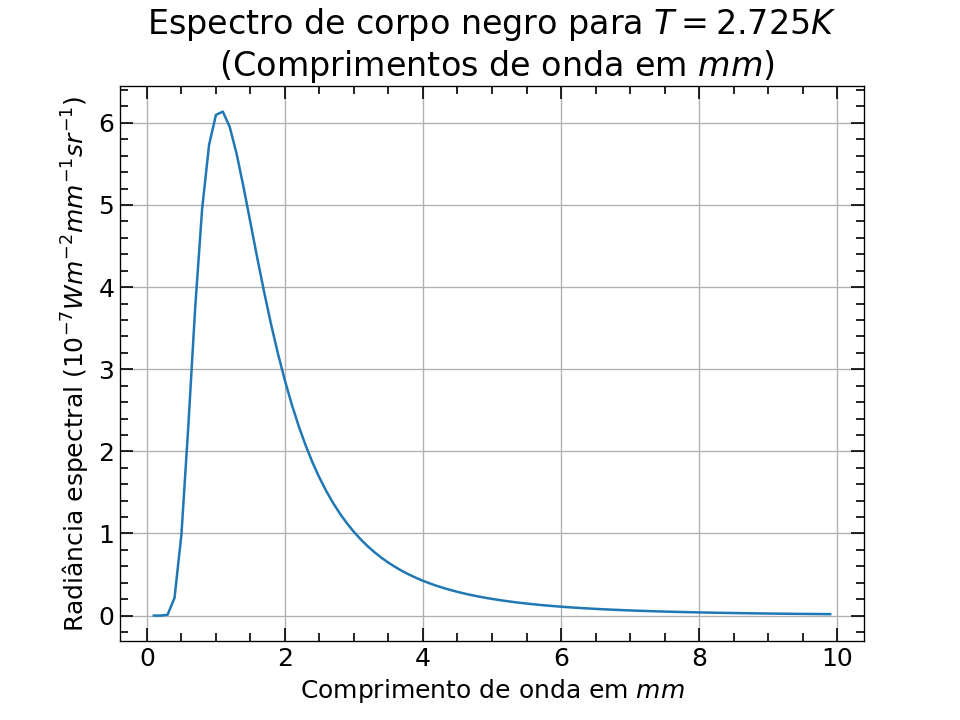

In [16]:
wl = np.arange(0.1,10,0.1) * pq.mm
I = B(wl,TCMB).rescale(pq.watt/(pq.m**2 * pq.mm * pq.sr))

fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(wl, I*1e7)
ax.set_title('Espectro de corpo negro para $T = 2.725 K$ \
\n (Comprimentos de onda em $mm$)')
ax.title.set_fontsize(20)
ax.set_xlabel('Comprimento de onda em $mm$')
ax.xaxis.label.set_fontsize(15)
ax.set_ylabel('Radiância espectral ($10^{-7} W m^{-2} mm^{-1} sr^{-1}$)')
ax.yaxis.label.set_fontsize(15)
ax.grid()
opt_plot()

plt.savefig('Corpo negro em T = 2.725 K - Lambda.png')

### Caso 2.

### Unidades: $[\nu]=GHz$ e $[B]=Wm^{-2}GHz^{-1}sr^{-1}$

Frequentemente encontraremos gráficos em que $B$ é expresso como uma função da frequência $\nu$ medido em $Hz$ em vez de obtê-lo como uma função do comprimento de onda $\lambda$ como temos feito até agora. A fórmula de Planck é escrita neste caso da seguinte forma:

$$B_{\nu}(T)=\frac{2h\nu^{3}}{c^{2}}\cdot\frac{1}{e^{\frac{h\nu}{k_{B}T}}-1}$$

Onde $\nu$ é a frequência de radiação, medida em $Hz$.

Vamos escrever uma função para calcular $B$ de acordo com a fórmula anterior:

In [17]:
def B_f(wf,T):
    '''wf é um array de frequências com unidades em GHz;
    T é uma temperatura expressada em Kelvin;
    o resultado é um array de radiâncias espectrais
    com unidades W/(m**2 x GHz x sr)
    '''
    wf = wf.rescale(pq.hertz)
    I = 2 * pq.constants.h * wf**3 / pq.c**2 * 1 \
        / (np.exp((pq.constants.h*wf \
        / (pq.constants.k*T)).simplified)-1)
    return I.rescale(pq.watt/(pq.m**2 * pq.gigahertz *pq.sr))

Vamos fazer um teste da função:

In [18]:
B_f(10**13*pq.hertz, 7000*pq.K)

array(0.20777705) * W/(m**2*sr*GHz)

Agora vamos construir o gráfico:

<IPython.core.display.Javascript object>


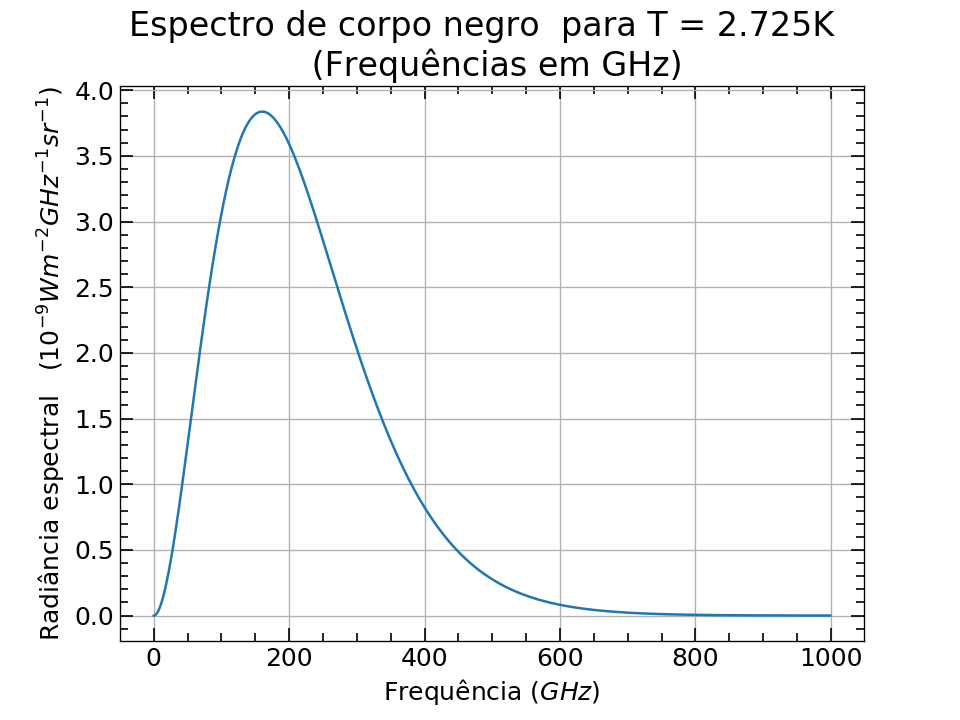

In [19]:
wf = np.arange(0.1,1000,1)* pq.gigahertz
I = B_f(wf,TCMB)

fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(wf, I*10**9) # Escalamos as unidades
ax.set_title('Espectro de corpo negro  para T = 2.725K \
 \n (Frequências em GHz)')
ax.title.set_fontsize(20)
ax.set_xlabel('Frequência ($GHz)$')
ax.xaxis.label.set_fontsize(15)
ax.set_ylabel('Radiância espectral   $(10^{-9} W m^{-2} GHz^{-1} sr^{-1})$')
ax.yaxis.label.set_fontsize(15)
ax.grid()
opt_plot()

plt.savefig('Corpo negro em T = 2.725 K - Frequências em GHz.png')

### Caso 3.

### Unidades: $[\nu]=cm^{-1}$ e $[B]=Wm^{-2}cm\cdot sr$

O fato é que a unidade preferida de frequências quando se trata de representar os valores de frequências CMB é o "número de onda $k$", que expressa o número de comprimentos de onda em uma unidade de distância. Geralmente é expresso em unidades de "ciclo/cm" ou $cm^{-1}$ sendo o número de ciclo uma magnitude adimensional.

Veremos abaixo como as conversões para ciclos/cm podem ser feitas...

Vamos começar fazendo uma conversão de $160$ $GHz$ em $cm^{-1}$:

In [20]:
frec = 160 * pq.gigahertz
wl = pq.c  / frec
print('Comprimento de onda [cm] = ', wl.rescale(pq.cm))
k = 1/( wl.rescale(pq.cm))
print(u'Número de onda [ciclos/cm] = ', k)

Comprimento de onda [cm] =  0.18737028625000005 cm
Número de onda [ciclos/cm] =  5.337025523170431 1/cm


A conversão pode ser feita de forma mais abreviada, basta dividir pela velocidade da luz!

In [21]:
fec_en_wave_number = (frec/pq.c).rescale(1/pq.cm)
print(u'Número de onda [1/cm] =', fec_en_wave_number)

Número de onda [1/cm] = 5.337025523170432 1/cm


A título de curiosidade, a unidade de frequência $cm^{-1}$ é denominada no sistema [cgs](https://www.maplesoft.com/support/help/Maple/view.aspx?path=Units/CGS) de unidades, de "*kayser*".

A lei de Planck é escrita de forma diferente da anterior quando a frequência é inserida em ciclos por unidade de comprimento ($k$). Sua forma, neste caso, é a seguinte:

$$B_{k}(T)=2hc^{2}k^{3}\cdot\frac{1}{e^{\frac{hck}{k_{B}T}}-1}$$

$\textbf{OBS:}$ A unidade de número de onda (ciclos por unidade de comprimento) não deve ser confundida com a unidade de número de onda angular, que normalmente também é representada pelo símbolo $k$, mas cujo valor é $2\pi$ multiplicado pela unidade anterior.

Definiremos a seguir uma função para calcular a radiância espectral de acordo com a fórmula anterior:

In [22]:
def B_k(wk,T):
    '''wk é um array de frequências com unidades em cm^(-1);
    T é uma temperatura expressada em Kelvin;
    O resultado é um array de radiâncias espectrais
    com unidades em W/(m**2 x cm**(-1) x sr)
    '''
    wk = wk.rescale(1/pq.m)
    I = 2 * pq.constants.h * pq.c**2 * wk**3  * 1 \
        / (np.exp((pq.constants.h*pq.c*wk \
        / (pq.constants.k*T)).simplified)-1)
    return I.rescale(pq.watt/(pq.m**2 * pq.cm**(-1)*pq.sr))

Uma primeira verificação:

In [23]:
f = 5.35 * pq.cm**(-1)
B_k(f, TCMB)

array(1.15020299e-07) * cm*W/(m**2*sr)

E então obteremos o gráfico correspondente nas novas unidades:

<IPython.core.display.Javascript object>


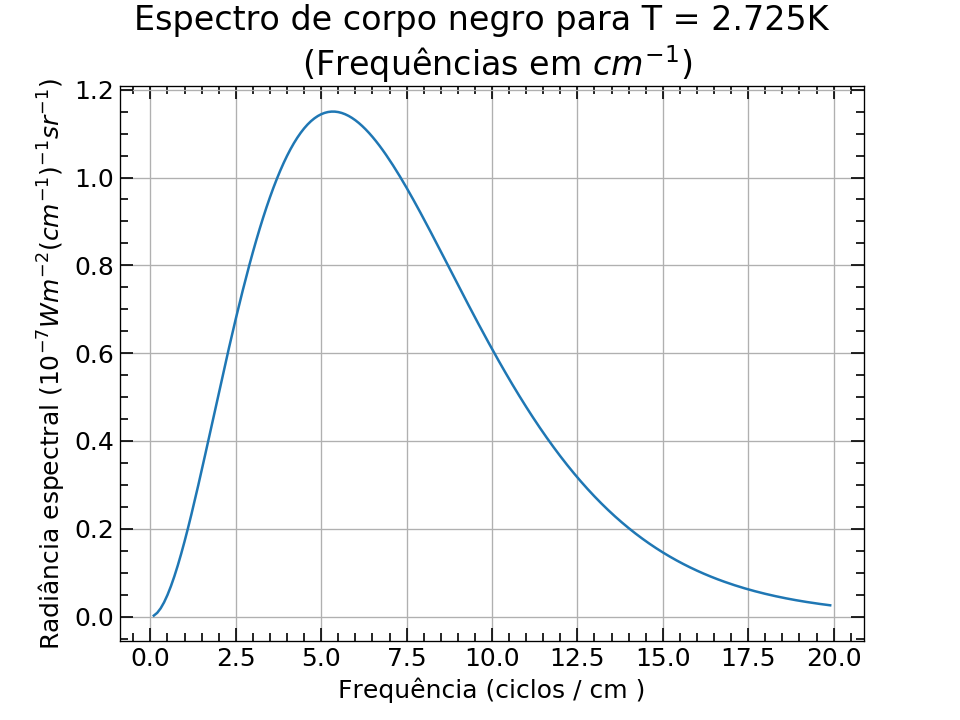

In [24]:
wk = np.arange(0.1,20,0.1) / pq.cm
I = B_k(wk,TCMB)
I = I*10**7 # Expressamos as unidades em múltiplos de 10^(-7)

fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(wk, I)
ax.set_title('Espectro de corpo negro para T = 2.725K \
 \n (Frequências em $cm^{-1}$)')
ax.title.set_fontsize(20)
ax.set_xlabel('Frequência (ciclos / cm )')
ax.xaxis.label.set_fontsize(15)
ax.set_ylabel('Radiância espectral $(10^{-7}W m^{-2} (cm^{-1})^{-1}sr^{-1})$')
ax.yaxis.label.set_fontsize(15)
ax.grid()
opt_plot()

plt.savefig('Corpo negro em T = 2.725 K - Frequências em cm^(-1).png')

### Caso 4.

### Unidades: $[\nu]=cm^{-1}$ e $[B]=MJy\cdot sr^{-1}$

Pois bem, existe ainda uma outra unidade de frequência, a Jansky, na qual estão codificados os dados que podemos baixar do COBE e que se define como:

$$1Jy=10^{-26}\frac{W}{m^{2}Hz}$$

Um múltiplo seu será o *Megajansky* = $10^{6}$ janskys.

Seu uso é especialmente difundido na radioastronomia. Para poder trabalhar em Python com essas unidades, iremos defini-las usando a biblioteca `quantities`:

In [25]:
Jy = pq.UnitQuantity('jansky', 1e-26*pq.watt/(pq.m**2*pq.hertz), symbol = 'Jy')
MJy = pq.UnitQuantity('megajansky', 10**6 * Jy, symbol = 'MJy')

Vejamos um exemplo de conversão de radiância espectral para estas unidades:

In [26]:
I = 3.34 * 10**(-18) * pq.W * pq.m**(-2) * pq.hertz**(-1) * pq.sr**(-1)
I.rescale(MJy)

array(334.) * MJy

Agora vamos formar o gráfico colocando as frequências no eixo $x$ em ciclos/cm ($cm^{-1}$), e o fluxo radiante no eixo $y$ em $MJy\cdot sr^{-1}$:

<IPython.core.display.Javascript object>


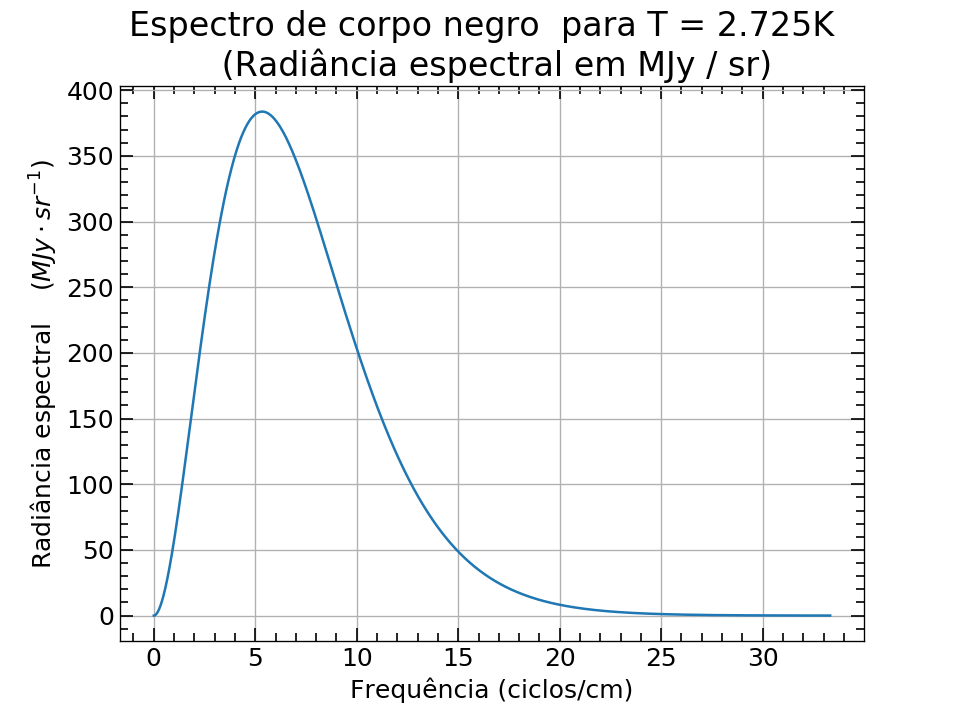

In [27]:
wf = np.arange(0.1,1000,1)* pq.gigahertz
I = B_f(wf,TCMB)
I = I.rescale(MJy*pq.sr**(-1)) # Conversão para MJy * sr**(-1)

wk = (wf/pq.c).rescale(1/pq.cm) # Conversão da frequência para 1/cm
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(wk, I)
ax.set_title('Espectro de corpo negro  para T = 2.725K \
 \n (Radiância espectral em MJy / sr)')
ax.title.set_fontsize(20)
ax.set_xlabel('Frequência (ciclos/cm)')
ax.xaxis.label.set_fontsize(15)
ax.set_ylabel('Radiância espectral    ($MJy \cdot sr^{-1}$)')
ax.yaxis.label.set_fontsize(15)
ax.grid()
opt_plot()

plt.savefig('Corpo negro em T = 2.725 K - Radiância espectral em MJy por sr^(-1).png')

## Espectro de CMB segundo os dados do COBE

 Uma vez explorados os diferentes tipos de unidades em que pode ser apresentado o gráfico do espectro de radiação da radiação cósmica de fundo, utilizaremos o último formato apresentado (**Caso 4.**), pois é justamente nessas unidades que os dados do satélite COBE podem ser obtidos.

Você pode realizar o download dos dados do espectro CMB obtidos com o instrumento COBE FIRAS, que estão publicamente disponíveis no [FIRAS CMB Monopole Spectrum](https://lambda.gsfc.nasa.gov/product/cobe/firas_monopole_get.cfm) [8]. Para ler o arquivo e poder manipulá-lo com facilidade, vamos usar a biblioteca `Pandas` do Python.

O primeiro passo será fazer o download do arquivo encontrado no endereço indicado. Este é o arquivo "`firas_monopole_spec_v1.txt`" no qual, abrindo-se com um editor de texto, observa-se que as colunas são delimitadas por espaços, e no qual as primeiras 18 linhas são comentários e devem ser omitidas, embora devamos lê-las uma vez que elas descrevem as unidades usadas e o significado de cada coluna de dados.

Uma vez que o arquivo foi baixado para um subdiretório em nosso disco, agora criamos um dataframe Pandas com as 5 colunas de dados. O separador usado é uma expressão regular que significa usar qualquer número de espaços como separador entre as colunas.

In [28]:
df = pd.read_table('firas_monopole_spec_v1.txt', 
    skiprows=18, sep='\s+', header=None, 
    names =['freq', 'I', 'residual', 'uncert', 'poles'])

Vamos ver a tabela obtida:

In [29]:
df

,freq,I,residual,uncert,poles
0,2.27,200.723,5,14,4
1,2.72,249.508,9,19,3
2,3.18,293.024,15,25,-1
3,3.63,327.770,4,23,-1
4,4.08,354.081,19,22,3
5,4.54,372.079,-30,21,6
6,4.99,381.493,-30,18,8
7,5.45,383.478,-10,18,8
8,5.90,378.901,32,16,10
9,6.35,368.833,4,14,10


Finalmente, vamos usar as duas primeiras colunas do dataframe para sobrepor esses pontos do espectro CMB medido pela missão COBE à curva anterior do espectro de um corpo negro a uma temperatura de $2.725K$. No gráfico resultante, pode-se observar que os dados do espectro CMB se ajustam perfeitamente ao espectro teórico, e pode-se concluir que a radiação cósmica de fundo segue um padrão perfeito de corpo negro.

<IPython.core.display.Javascript object>


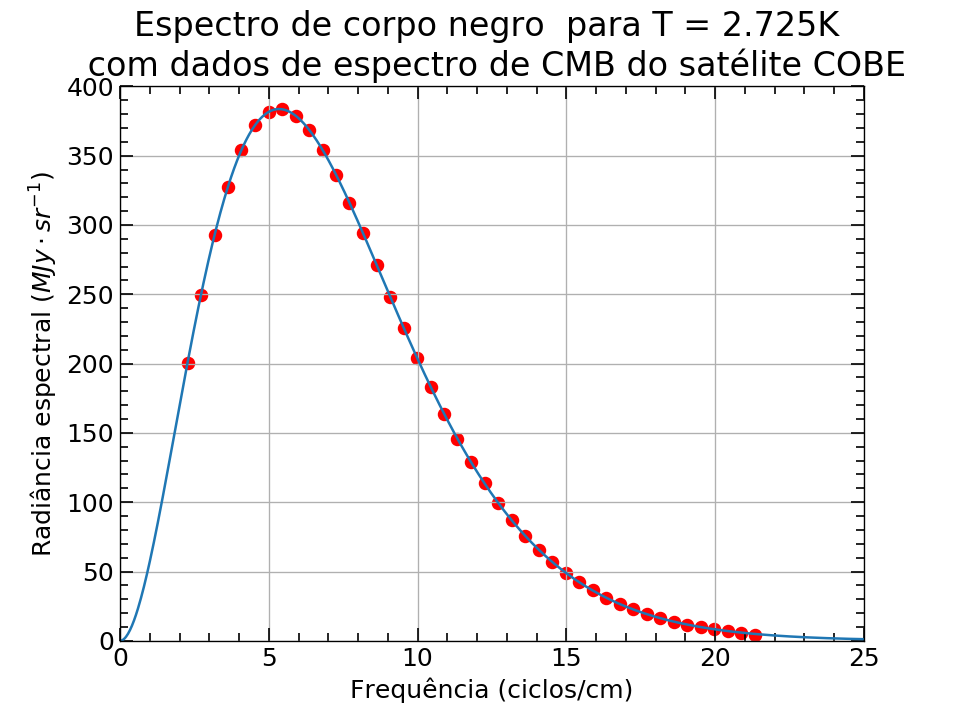

In [30]:
wf = np.arange(0.1,1000,1)* pq.gigahertz
I = B_f(wf,TCMB)
I = I.rescale(MJy*pq.sr**(-1)) # convertimos a MJy * sr**(-1)

wk = (wf/pq.c).rescale(1/pq.cm) # convertimos frecuencias a 1/cm

fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(wk, I)
ax.set_title(u'Espectro de corpo negro  para T = 2.725K \
\n com dados de espectro de CMB do satélite COBE')
ax.title.set_fontsize(20)
ax.set_xlabel('Frequência (ciclos/cm)')
ax.xaxis.label.set_fontsize(15)
ax.set_ylabel('Radiância espectral ($MJy \cdot sr^{-1}$)')
ax.yaxis.label.set_fontsize(15)
ax.set_xlim(0,25)
ax.set_ylim(0,400)

ax.scatter(df['freq'], df['I'],c='red', s= 50)
ax.grid()
opt_plot()

plt.savefig('Corpo negro em T = 2.725 K - Espectro de CMB - COBE.png')

### Referências:

[1] Mark Newman - Computational Physics (2013, University of Michigan) 

[2] Nicholas J. Giordano; Hisao Nakanishi - Computational Physics (2005, Addison-Wesley,Second Edition) 

[3] Bose Plancks Gesetz und Lichtquantenhypothese. Z. Physik 26, 178–181 (1924). https://doi.org/10.1007/BF01327326

[4] Bose, Satyandranath. (2005). A lei de Planck e a hipótese dos quanta de luz. Revista Brasileira de Ensino de Física, 27(3), 463-465. https://dx.doi.org/10.1590/S1806-11172005000300024 (Tradução do artigo citado na referência [3]).

[5] Database de Betelgeuse (HD 39801) - Simbad (http://simbad.u-strasbg.fr/simbad/sim-id?Ident=HD+39801)

[6] Site da NASA com mais detalhes sobre a CMB : https://wmap.gsfc.nasa.gov/universe/bb_tests_cmb.html

[7] Site do COBE : https://lambda.gsfc.nasa.gov/product/cobe/

[8] FIRAS CMB Monopole Spectrum : https://lambda.gsfc.nasa.gov/product/cobe/firas_monopole_get.cfm